Descriptive and Inferential Analysis of Drug Overdose Deaths in Connecticut

From 2012 - 2018, the state of Connecticut collected and compiled a sample of approximately 5,100 death by overdose. Over the course of this period, overdoses increased noticeably, with heroin overdoses alone spiking in 2017 at 3x the rate seen in 2012.

The purpose is to extrapolate observations from the statistical manipulation of th3 dataset in the hope of answering the following questions:

- What is the distribution of ages, sexes, and races? Who is the most affected?

- What is the distribution of places of residence?

- Has the magnitude of overdose deaths changed over time? If so, how much?

- How has overdose frequency by a given drug changed over time?

- Where do the majority of overdose deaths occur?

Outline:

I. Cleaning Data

II. Descriptive Analysis 

III. Inferential Analysis 

IV. Summary and Conclusion

I. Cleaning Data

In [122]:
#importing modules

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [123]:
# Use a raw string for the file path
file_path = r"C:\Users\aidan\Downloads\archive\drug_deaths.csv"

# Read the CSV file into a DataFrame
drugsdata = pd.read_csv(file_path)

In [124]:
drugsdata.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [125]:
drugsdata.tail()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
5100,5100,15-0466,09/08/2015 12:00:00 AM,1.0,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,...,0,0,0,NaN,0,0,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,5101,17-0618,07/22/2017 12:00:00 AM,1.0,21.0,Male,White,MADISON,NEW HAVEN,CT,...,0,0,0,NaN,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,5102,18-0646,08/14/2018 12:00:00 AM,0.0,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,...,1,0,0,NaN,0,1,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,5103,14-0124,03/16/2014 12:00:00 AM,0.0,33.0,Male,White,HARTFORD,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"
5104,5104,16-0637,09/15/2016 12:00:00 AM,0.0,33.0,Male,White,THOMASTON,LITCHFIELD,CT,...,0,0,0,NaN,0,1,Accident,"WATERBURY, CT\n(41.554261, -73.043069)","THOMASTON, CT\n(41.674124, -73.073189)","WATERBURY, CT, CT\n(41.554261, -73.043069)"


Age column is stored as a float, convert them to an integer. Remove the NaN (null) values first - since there are only three, dropping them is the simplest solution.

In [126]:
drugsdata.dropna(subset = ['Age'], inplace=True)

In [127]:
#convert the datatype
drugsdata = drugsdata.astype({'Age':'int'})

In [128]:
#convert datatype of Fentanyl columns, which are stored differently than the other drug columns despite containing only numerics
drugsdata = drugsdata.astype({'Fentanyl_Analogue':'int'})

In [129]:
#convert Date column to datetime format, drop a single null row.  
drugsdata.dropna(subset = ['Date'], inplace=True)
drugsdata['Date'] = pd.to_datetime(drugsdata['Date'])

C:\Users\aidan\AppData\Local\Temp\ipykernel_20376\2003053772.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drugsdata['Date'] = pd.to_datetime(drugsdata['Date'])


In [130]:
#create new columns for year and month 
drugsdata['month'] = pd.DatetimeIndex(drugsdata['Date']).month
drugsdata['year'] = pd.DatetimeIndex(drugsdata['Date']).year
drugsdata['day'] = pd.DatetimeIndex(drugsdata['Date']).day

In [131]:
#convert these new columns to integer form again
drugsdata = drugsdata.astype({'month':'int'})
drugsdata = drugsdata.astype({'year':'int'})

In [132]:
#a handful of the values in the manner of death column are not capitalized consistently with the others
drugsdata['MannerofDeath'] = drugsdata['MannerofDeath'].str.upper()

In [133]:
#final column types
drugsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5101 entries, 1 to 5104
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           5101 non-null   int64         
 1   ID                   5101 non-null   object        
 2   Date                 5101 non-null   datetime64[ns]
 3   DateType             5101 non-null   float64       
 4   Age                  5101 non-null   int32         
 5   Sex                  5098 non-null   object        
 6   Race                 5091 non-null   object        
 7   ResidenceCity        4932 non-null   object        
 8   ResidenceCounty      4308 non-null   object        
 9   ResidenceState       3556 non-null   object        
 10  DeathCity            5100 non-null   object        
 11  DeathCounty          4005 non-null   object        
 12  Location             5081 non-null   object        
 13  LocationifOther      590 non-null    o

In [134]:
#general statistics describing dataset 
drugsdata.describe()

,Unnamed: 0,Date,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,month,year,day
count,5101.000000,5101,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000
mean,2552.514997,2016-03-08 10:37:59.553028864,0.446775,41.967653,0.495785,0.297981,0.076260,0.118996,0.021172,0.244462,0.022937,0.263086,0.092923,0.031170,0.025485,0.004901,0.017252,6.652617,2015.675358,15.255244
min,1.000000,2012-01-01 00:00:00,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,1.000000
25%,1277.000000,2014-10-17 00:00:00,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2014.000000,7.000000
50%,2552.000000,2016-06-21 00:00:00,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2016.000000,15.000000
75%,3828.000000,2017-09-29 00:00:00,1.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2017.000000,23.000000
max,5104.000000,2018-12-31 00:00:00,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2018.000000,31.000000
std,1473.182441,NaN,0.497208,12.336298,0.500031,0.457416,0.265439,0.323816,0.143973,0.429810,0.149716,0.440352,0.290353,0.173795,0.157609,0.069842,0.130220,3.452093,1.858546,8.855105


II. Descriptive Analysis 

Demographic Information

Will start by breaking down race, sex, and age. 

In [135]:
#one row in our dataset contains "Unknown" for sex, so given it's a single instance, we'll simply drop it
drugsdata = drugsdata[drugsdata.Sex != 'Unknown']

C:\Users\aidan\AppData\Local\Temp\ipykernel_20376\2036783085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=drugsdata, palette=['blue', 'red'])


Text(0, 0.5, 'Overdose Frequency')

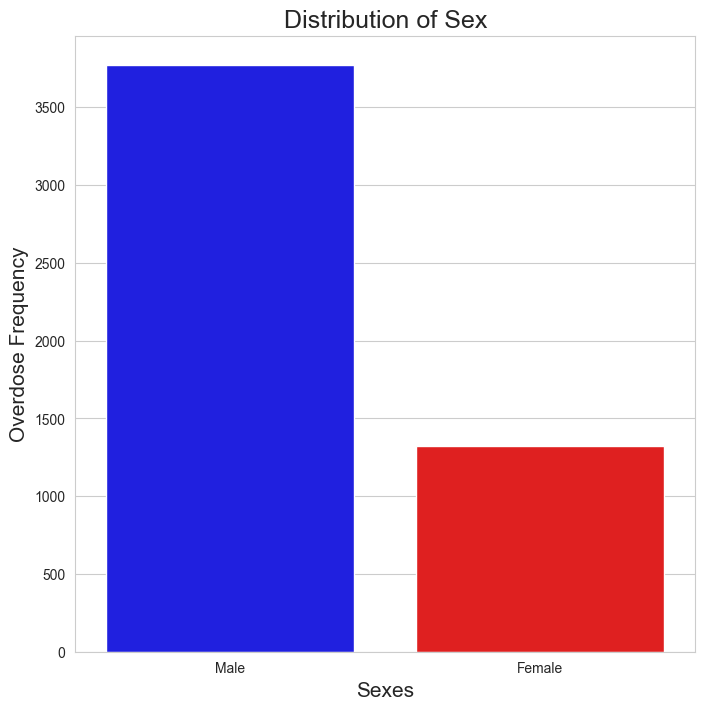

In [136]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot(x='Sex', data=drugsdata, palette=['blue', 'red'])
plt.title('Distribution of Sex', fontsize = 18)
plt.xlabel('Sexes', fontsize = 15)
plt.ylabel('Overdose Frequency', fontsize = 15)

In this dataset, males account for over 2x as many overdose deaths as women.

In [137]:
#grabbing counts for each
male = fent = drugsdata[drugsdata['Sex']=='Male']["year"].value_counts().sort_index()
fem = drugsdata[drugsdata['Sex']=='Female']["year"].value_counts().sort_index()

dfsex = pd.concat([male, fem], axis=1)
dfsex.columns=['Male', 'Female']

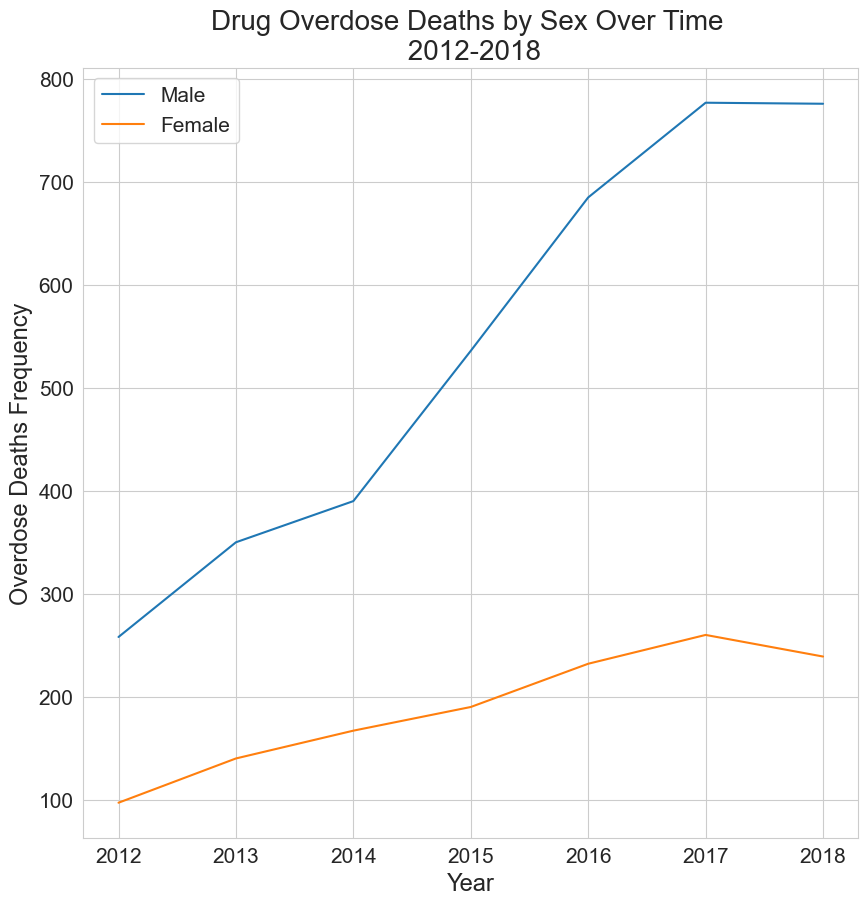

In [138]:
fig, ax = plt.subplots(figsize=(10,10))
dfsex.plot(ax=ax)
plt.title('Drug Overdose Deaths by Sex Over Time \n 2012-2018', fontsize = 20)
ax.set_xlabel('Year', fontsize = 17)
ax.set_ylabel('Overdose Deaths Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":15})

Male deaths increased 3X from 2012 by 2017. Female deaths peaked in 2017, an increase of 1.5X from 2012.

In [139]:
bins = [0, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, np.inf]
range_names = ['<21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70+']

drugsdata['AgeRanges'] = pd.cut(drugsdata['Age'], bins, labels = range_names)

C:\Users\aidan\AppData\Local\Temp\ipykernel_20376\3831635611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeRanges', data=drugsdata, palette = 'Greens')


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

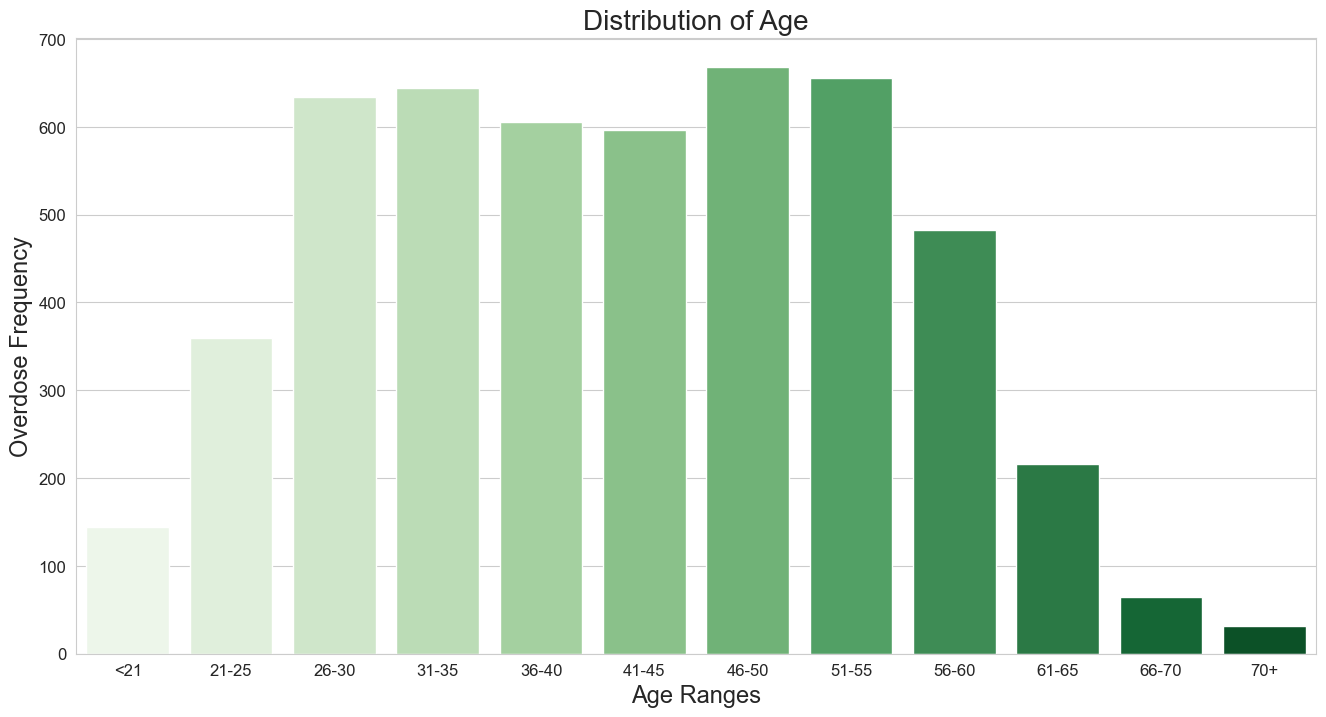

In [144]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x='AgeRanges', data=drugsdata, palette = 'Greens')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age Ranges', fontsize = 17)
plt.ylabel('Overdose Frequency', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

Age range with highest count: 46-50

Age range with lowest count: 70+

Mean age: 42

Minimum age: 14

Maximum age: 87

Text(0, 0.5, 'Overdose Death Frequency')

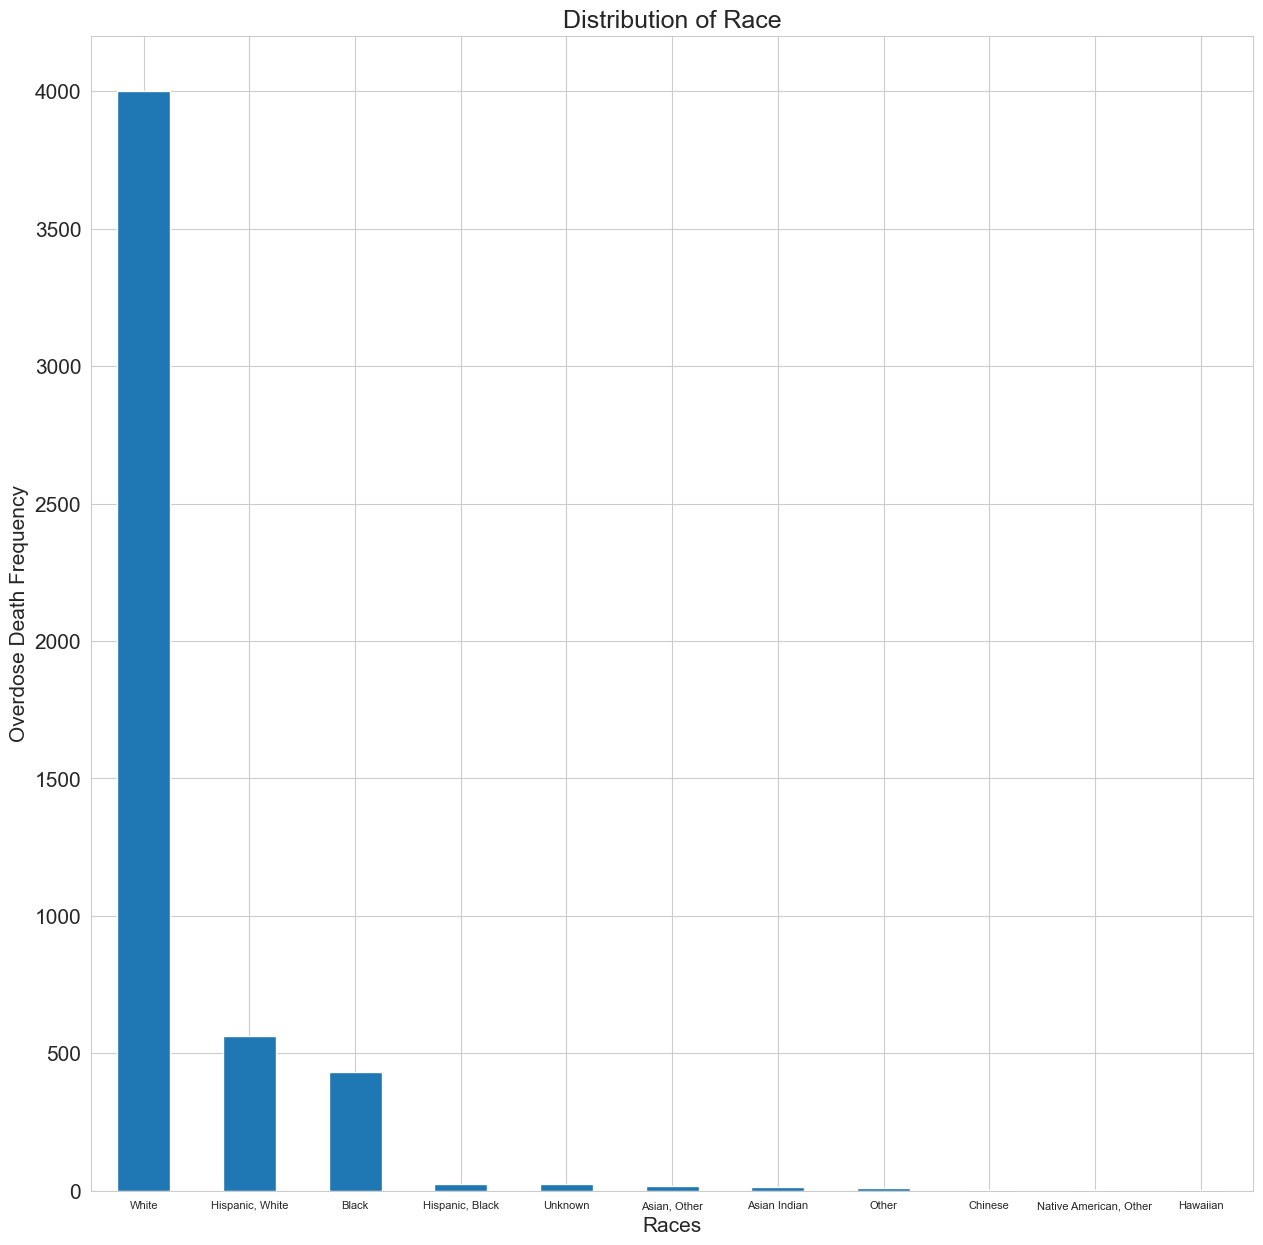

In [191]:
fig = plt.figure(figsize = (15, 15))
ax = drugsdata['Race'].value_counts().plot(kind='bar')
plt.title("Distribution of Race", fontsize = 18)
plt.xlabel("Races", fontsize = 15)
plt.xticks(rotation=0, fontsize = 8)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Death Frequency", fontsize = 15)

White individuals account for about 78% of the total counts.
The next two most highly represented races, composed of hispanic, white individuals and black individuals, account for about 19% of the total counts.
Asian, chinese, native American, hawaiian, and "unknown" or "other" races account for an incredibly marginal number of cases. They are by the least affected.

Text(0, 0.5, 'Overdose Frequency')

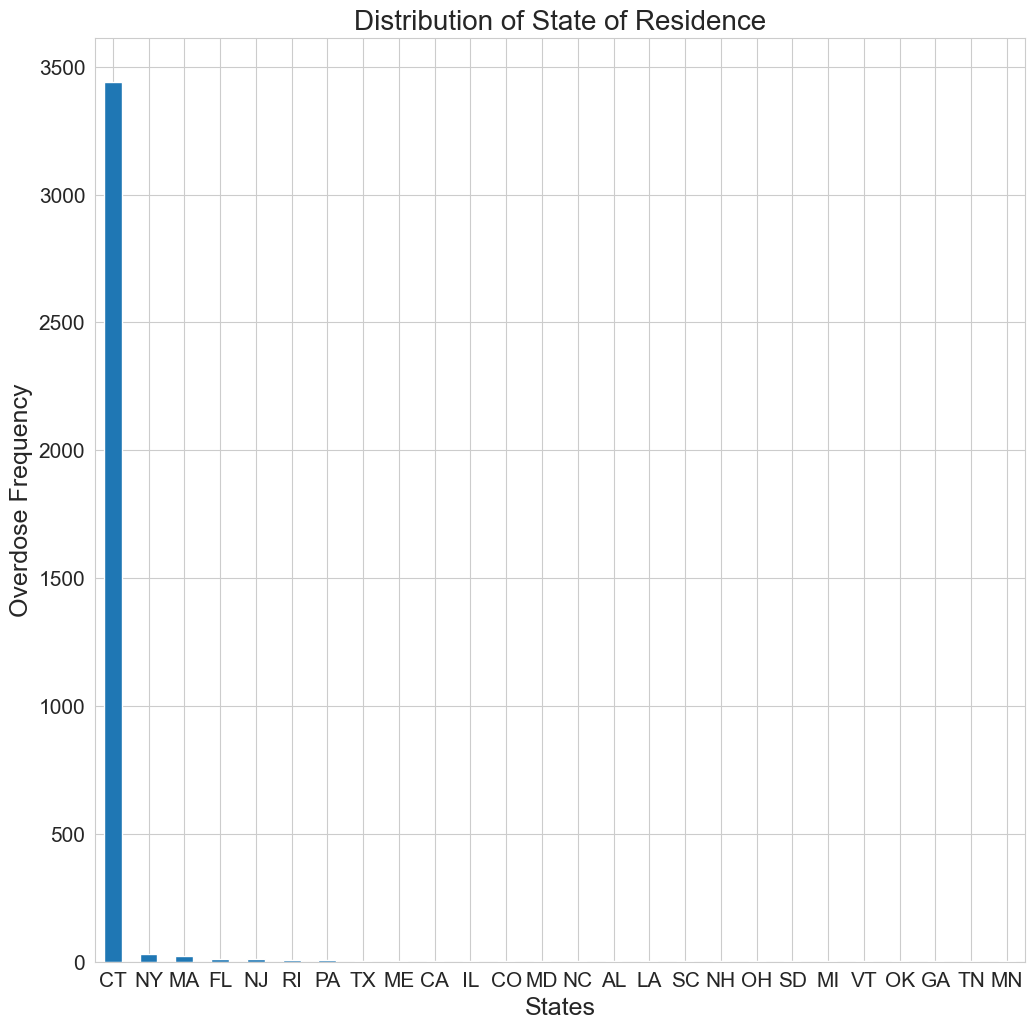

In [196]:
fig = plt.figure(figsize = (12, 12))
ax = drugsdata['ResidenceState'].value_counts().plot(kind='bar')
plt.title("Distribution of State of Residence", fontsize = 20)
plt.xlabel("States", fontsize = 18)
plt.xticks(rotation=0,fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Frequency", fontsize = 18)

Available points are composed of 96% Connecticut residents. The next most frequently represented states are New York and Massachuesetts.

In [147]:
top15_county = drugsdata['ResidenceCounty'].value_counts()[0:15]

Text(0, 0.5, 'Overdose Frequency')

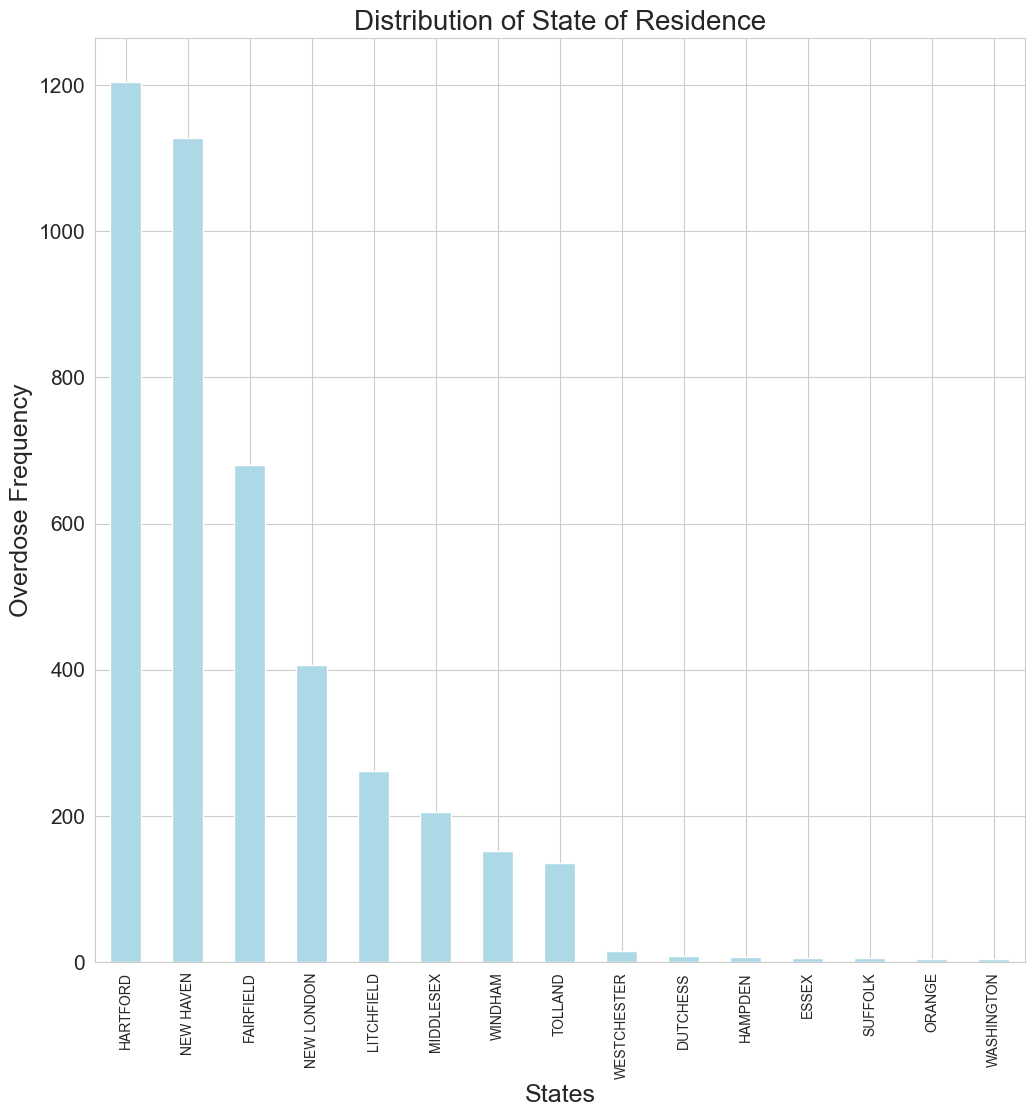

In [200]:
fig = plt.figure(figsize = (12, 12))
top15_county.plot(kind='bar', color = 'lightblue')
plt.title("Distribution of State of Residence", fontsize = 20)
plt.xlabel("States", fontsize = 18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Frequency", fontsize = 18)

Hartford accounts for about a quarter of all available datapoints, which is unsurprising given the capitol is located in this county. Six other counties, included New Haven and Fairfield, account for the majority of the remaining cases, the remaining counties of which report only a handful of cases each.

Drug Information

Overdose Frequency Over Time

Text(0, 0.5, 'Overdose Deaths')

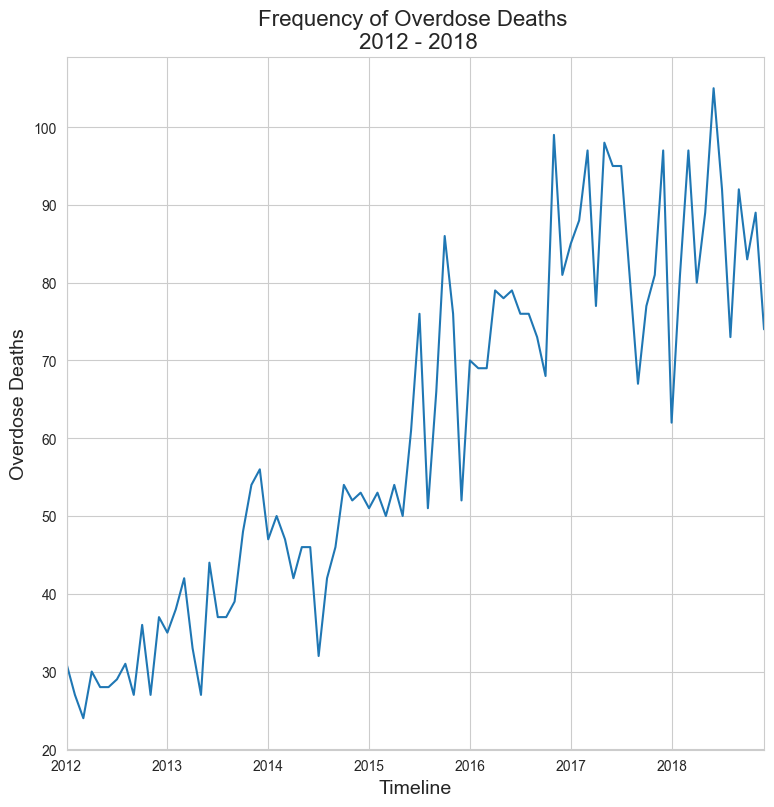

In [149]:
fig, ax = plt.subplots(figsize=(9,9))
plot_data = drugsdata.groupby(pd.Grouper(key='Date', freq='M')).count()['Unnamed: 0']
ax = plot_data.plot(ax=ax)
plt.title("Frequency of Overdose Deaths \n 2012 - 2018", fontsize = 16)
plt.xlabel("Timeline", fontsize = 14)
plt.ylabel("Overdose Deaths", fontsize = 14)

Overdose deaths tend to spike in either direction every three to six months.
For comparison, 2018 appears to have experienced roughly 3x as many deaths as 2012.

Text(0, 0.5, 'Overdose Death Frequency')

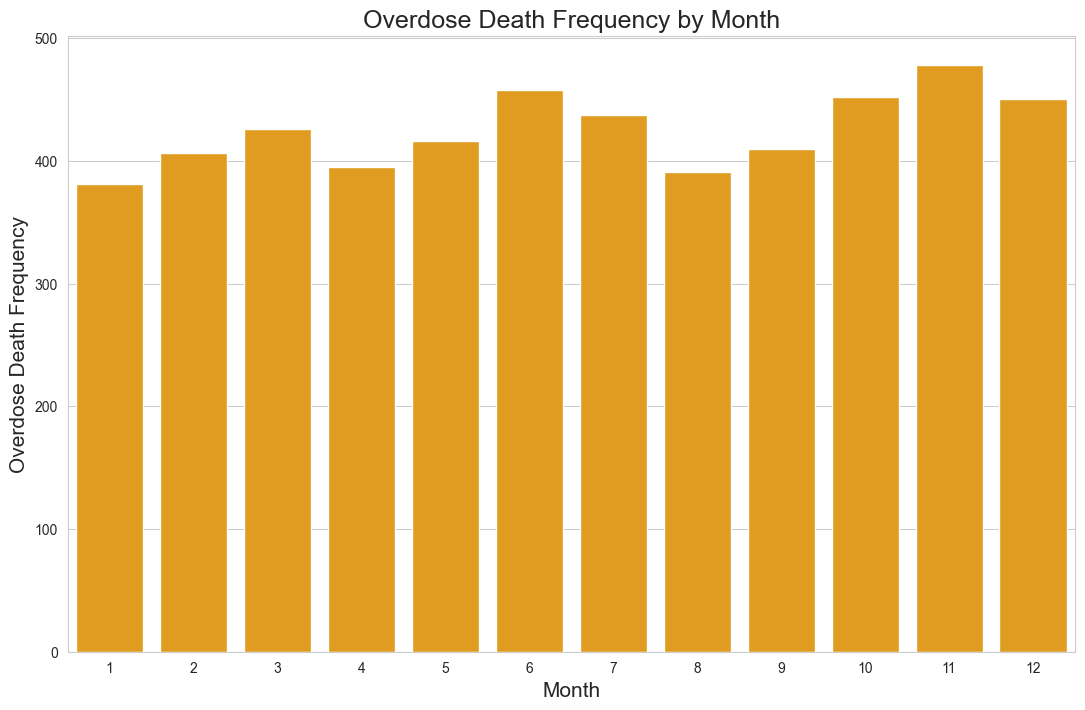

In [153]:
plt.figure(figsize=(13,8))
sns.countplot(x='month', data=drugsdata, color = 'orange')
plt.title('Overdose Death Frequency by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Overdose Death Frequency', fontsize = 15)

This confirms our general observation with the previous graph, which is that overdose deaths appear to cycle every few months, as opposed to a strictly hot/cold seasonal trend.
November demonstrates the highest overall rate, with January demonstrating the lowest by a small margin.

Text(0, 0.5, 'Overdose Death Frequency')

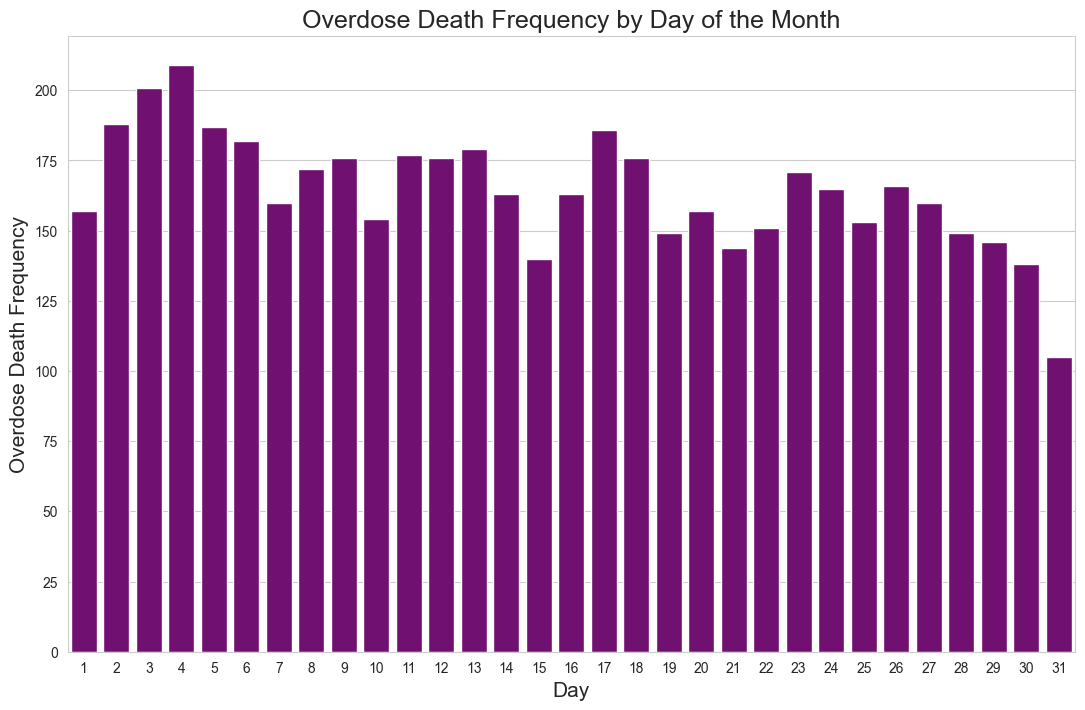

In [156]:
plt.figure(figsize=(13,8))
sns.countplot(x='day', data=drugsdata, color = 'purple')
plt.title('Overdose Death Frequency by Day of the Month', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Overdose Death Frequency', fontsize = 15)

Overdoses by Drugs of Choice

In [157]:
#pulling our counts by year
her = drugsdata[drugsdata['Heroin']==1]["year"].value_counts().sort_index()
morph_NH = fent = drugsdata[drugsdata['Morphine_NotHeroin']==1]["year"].value_counts().sort_index()
coke = drugsdata[drugsdata['Cocaine']==1]["year"].value_counts().sort_index()
fent = drugsdata[drugsdata['Fentanyl']==1]["year"].value_counts().sort_index()
fentA = drugsdata[drugsdata['Fentanyl_Analogue']==1]["year"].value_counts().sort_index()
oxyC = drugsdata[drugsdata['Oxycodone']==1]["year"].value_counts().sort_index()
oxyM = drugsdata[drugsdata['Oxymorphone']==1]["year"].value_counts().sort_index()
eth = drugsdata[drugsdata['Ethanol']==1]["year"].value_counts().sort_index()
hydroC = drugsdata[drugsdata['Hydrocodone']==1]["year"].value_counts().sort_index()
benzo = drugsdata[drugsdata['Benzodiazepine']==1]["year"].value_counts().sort_index()
metha = drugsdata[drugsdata['Methadone']==1]["year"].value_counts().sort_index()
amph = drugsdata[drugsdata['Amphet']==1]["year"].value_counts().sort_index()
tram = fent = drugsdata[drugsdata['Tramad']==1]["year"].value_counts().sort_index()
hydroM = drugsdata[drugsdata['Hydromorphone']==1]["year"].value_counts().sort_index()
other = drugsdata[drugsdata['Other']==1]["year"].value_counts().sort_index()

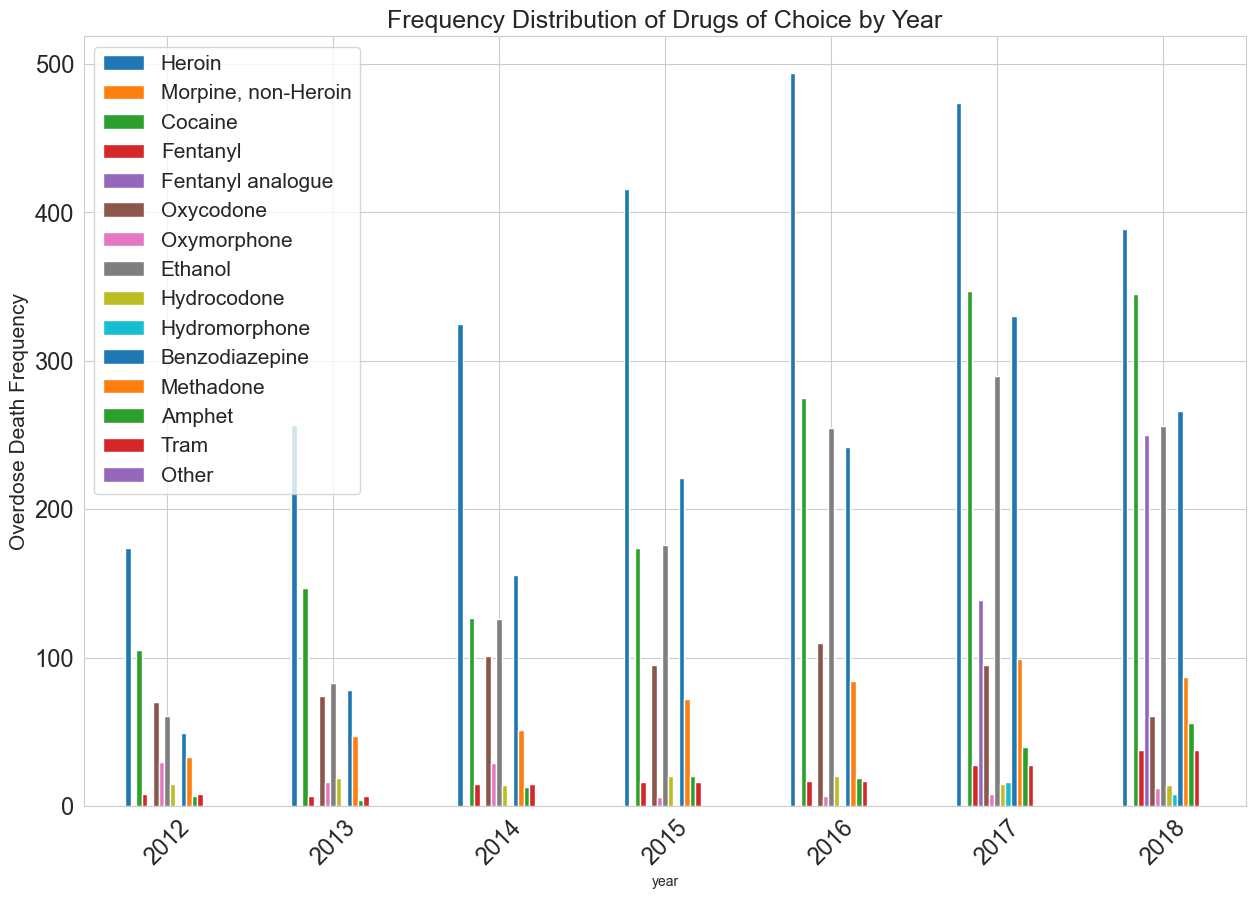

In [158]:
df = pd.concat([her, morph_NH, coke, fent, fentA, oxyC, oxyM, eth, hydroC, hydroM, benzo, metha, amph, tram, other], axis=1)
df.columns=['Heroin','Morpine, non-Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
           'Hydrocodone', 'Hydromorphone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tram', 'Other']
ax=df.plot(kind='bar',figsize=(15,10),fontsize=15)
plt.title("Frequency Distribution of Drugs of Choice by Year", fontsize = 18)
plt.xticks(fontsize = 17, rotation=45)
plt.yticks(fontsize = 17)
plt.ylabel("Overdose Death Frequency", fontsize = 15)
plt.legend(prop={"size":15})

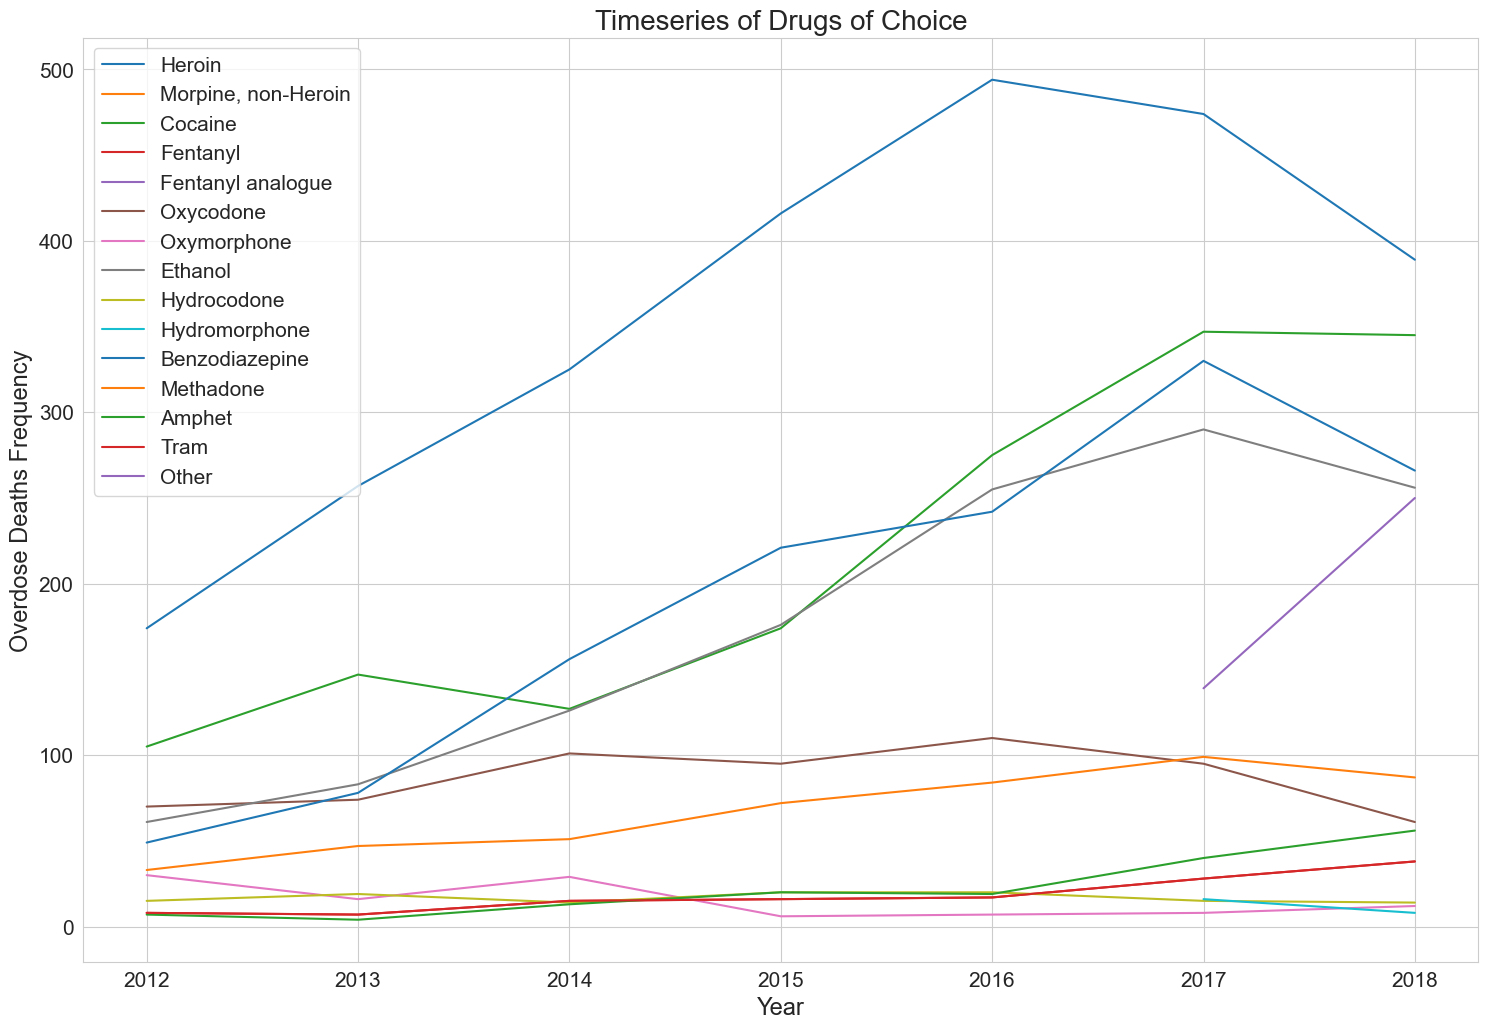

In [159]:
fig, ax = plt.subplots(figsize=(18,12))
df.plot(ax=ax)
plt.title('Timeseries of Drugs of Choice', fontsize = 20)
ax.set_xlabel('Year', fontsize = 17)
ax.set_ylabel('Overdose Deaths Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":15})

Heroin is by far the most frequently used drug of choice in death by overdose cases. It's usage peaked in 2016 with just short of 500 cases, declining to just short of 400 by 2018.

Benzodiazepine and cocaine are the next most frequent, and likewise took a noticeable upswing over the given timeframe.

Tracking of fentanyl analogues began in 2017, with an upward trend. This substance outstrips usage of fentanyl proper, both comparatively before analogue introducton and demonstrably after.

Oxycodone and Oxymorphone, both highly potent prescription painkillers, show relatively little change over time. The latter especially acounts for only a few cases per year.

Usage of ethanol increased substantially over the years, with 2017 reporting roughly 3x as many cases as in 2012.

Overdose Frequency by Location

Text(0, 0.5, 'Overdose Death Frequency')

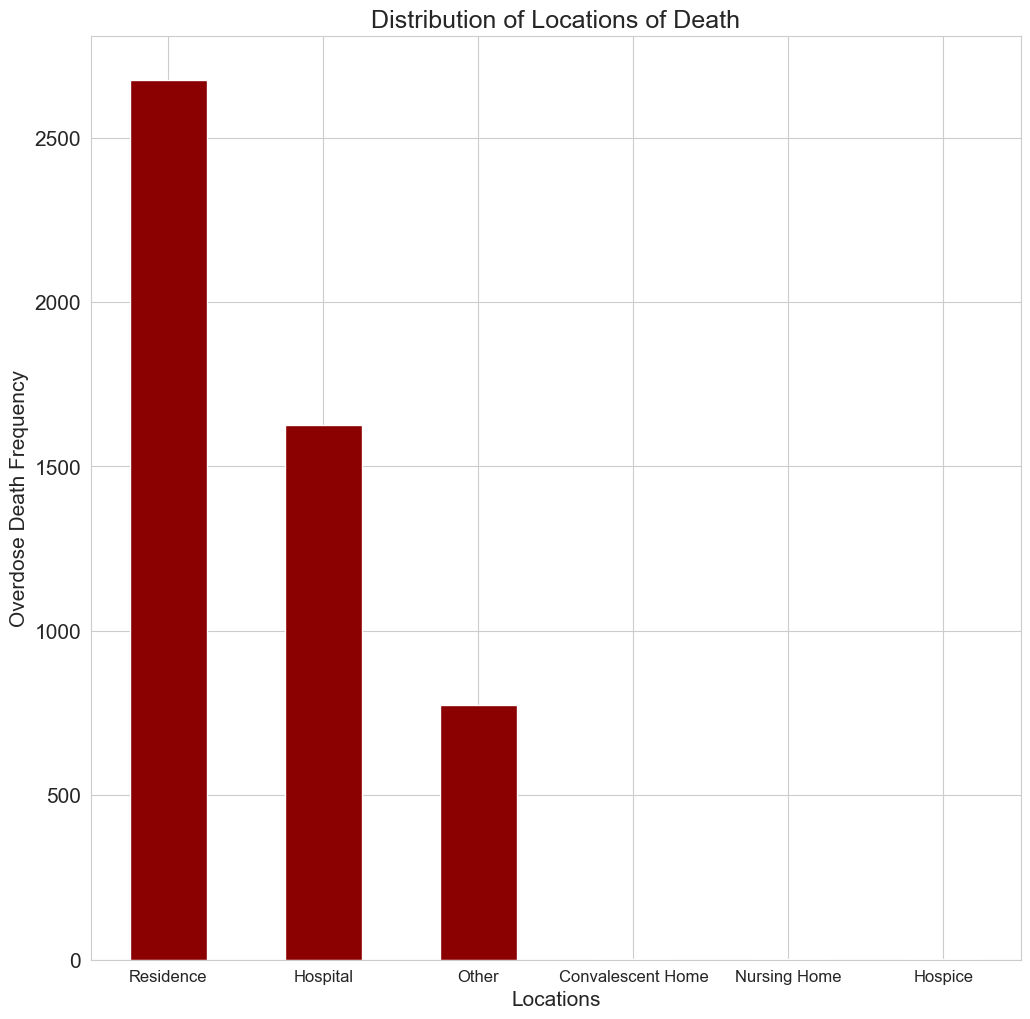

In [205]:
fig = plt.figure(figsize = (12, 12))
ax = drugsdata['Location'].value_counts().plot(kind='bar', color = 'darkred')
plt.title("Distribution of Locations of Death", fontsize = 18)
plt.xlabel("Locations", fontsize = 15)
plt.xticks(rotation=0,fontsize = 12)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Death Frequency", fontsize = 15)

Many overdose deaths occur at home, accounting for approximately 53% of all deaths. This likely because the home environment is where most would feel safe and less afraid of interference when consuming an illicit substance.
Hospitals are the next most frequent (~31%), followed by "other", which represents a considerable variety of outcomes.

In [161]:
drugsdata['LocationifOther'].unique()

array([nan, 'Honey Spot', 'Motel 6', 'Hotel/Motel', 'Park',
       "Friend's Home", 'Outside', 'Dunkin donuts', "Father's house",
       'Halfway house', "Friend's House", 'Vacant Apartment',
       'Abandoned Building', 'Sunnyside Inn', 'Basement', 'Wooded Area',
       "Friend's Apartment", "Cousin's residence", "Neighbor's Home",
       'Beach', "Mother's House", 'Public bathroom',
       'Restaurant Bathroom', 'McDonald Park', "Friend's Residence",
       "Parent's Home", 'Super 8 Motel Room 219', 'Friends House',
       'Roadway', 'Econo Lodge', 'Back Stairwell', "Cousin's house",
       "Friends's Residence", 'Wooded area', "Girlfriend's House",
       "Girlfriend's Residence", 'In Vehicle',
       'Under overpass I-91 North', "Neighbor's apartment", 'Motel',
       'Honeyspot Motor Lodge', 'Cube Smart', "Caretaker's House",
       'Coventry CT State Boat Launch', 'Travel Inn Motel',
       "Cousin's House", "Mother's Residence", 'In car in front of',
       'Outdoor Stairwell', 

III. Inferential Analysis

Hypothesis Testing Review

At the core of the scientific method is the concept known as hypothesis testing, or the formulation of a research question that is testable with the available data. Some examples include:


- Eating spinach during childhood helps one to grow stronger.

- Businesses in large cities are more likely to experience theft than those in small towns.

- Students who score at least 26 on the ACT are more likely to go to college than those who scored lower.

Hypotheses are comprised of two principal components:

- Null hypothesis, or the default statement that there is no relationship between two phenomena or groups.

- Alternative hypothesis, or the alternative to the null, stating that there is a relationship between phenomena or groups. This is the statement the researcher typically wants to prove.

Statistical inference tests assume the null to be true, requiring contrary evidence in order to disprove it. Ultimately, you either reject the null or you retain it.

Significance Levels and Directional Tests

Once you have determined your hypothesis, you need to determine the appropriate significance level, or a probability threshold that asserts whether you reject or retain the Null. Here, we choose a p-value, or probability value, that states the liklihood of obtaining a test result that is at least as extreme as the actually observed results, assuming the veracity of the null. Thus, if your test result is lower that the significance level, you can safely reject the null and assume the alternative.

We should also mention the term critical value, which represents the point beyond which it is safe to reject the null.

Signficance levels typically assume a set number of p-value options, for example: significance (α) = 0.05. Here, if our test value were to return 0.03, we would reject the null!

Another important aspect to consider is whether your test is going to be one-tailed or two-tailed. The "tail" refers to the end of the distribution of your selected test statistic. Some tests can be used with either mode, and you will need to select beforehand which is the most appropriate. Generally speaking:

- One-tailed tests are better when you only want to determine the difference between groups in a particular direction, for example determinine whether group X scored more highly on the GRE on average than group Y.
- Two-tailed tests are better if you are interested determining a group difference in either direction, for example if you wanted to know whether group X score higher or lower on the GRE on average than group Y.

If you have good reason to suspect a difference in one particular direction, then one-tailed is an appropriate choice, as it will offer more statistical power. Selecting a two-tailed option is reasonable if there is room for doubt.

We're almost ready to move on to some concrete examples, but first, it is appropriate to briefly mention the concepts of type I and type II errors.

Type I and Type II Errors

Type I errors are defined by the rejection of a true null, while type II errors are defined by the acceptance of a false null. For example, let's say your null hypothesis stated that those who lived in disadvantaged neighborhoods were less likely to have access to fresh produce, as compared to those who lived in middle-class neighborhoods:

- Type I: You determine that those who live in disadvantaged neighborhoods do have the same access to fresh produce, as compared to those in middle-class neighborhoods, despite the null being true.
- Type II: You determine that those who live in disadvantaged neighborhoods do not have the same access to fresh produce, as compared to those in middle-class neighborhoods, despite the null being false.
You can attempt to mitigate the possibility of one of these errors through the appropriate selection of the significance value, typically 0.01, 0.05, or 0.10. The liklihood of a type II error can be reduced through increase in sample size.

We'll sum up by listing the necessary steps to hypothesis testing.

Hypothesis Testing Checklist
- Define our null and alternative hypotheses.
- Define the significance level.
- Select your statistical test.
- Calculate the p-value/critical value.
- Test, and reject OR retain the null.

One-Sample Z-Test

One-sample z-tests are used to determine whether the mean of a given population is greater, lesser, or equal to a given value

Let's say that an up-and-coming political candidate is running for office in Connecticut. They assert that the average age of death by drug overdose in the state is below the overall average age of death in the country. You decided to fact-check this statement by downloading a dataset consisting of a sample of approximately 5100 (n) death-by-overdose cases in Connecticut. You learn that the mean (μ) age of death in this sample is 42, and later you determine the mean age of death for the general US population to be 79 with a standard deviation of 15 years.

In [169]:
import scipy.stats as stats

Step 1 - define null and alternative hypotheses
- Null H0 = The average age of death in our overdose sample is not lower than that of the general US population. μ = 79
- Alternative Ha = The average age of death in our overdose sample is lower than that of the general US population. μ < 79

Step 2 - determine significance level
We will select alpha = 0.05. We will also choose a one-tailed test since we're pretty certain the result will go in one direction.

Step 3 - selecting our test statistic
We know that the one-sample z-test is appropriate since we know the sample mean, the standard deviation, and that there is a sufficient number of items in our sample.

Step 4 - calculate critical value
This form of test requires that we calculate a critical value.

In [170]:
Zcritical = round(stats.norm.isf(q = 0.05),1)
print('Critical value is %3.6f' %Zcritical)

Critical value is 1.600000


Thus, our critical values are -1.6 and 1.6, with the inner values representing the 95% critical value accepted range. A value landing in this range indicated that we cannot reject the null.

In other words, in order to reject our null hypothesis, our test result will need to be less than or equal to -1.6 or greater than or equal to 1.6 .

Step 5 - calculate test result and determine veracity of null hypothesis

We now have the data necessary to run our one-sample z-test.

In [171]:
XAvg = 42
mu = 79
sigma = 15
n = 5100

Z = (XAvg - mu)/(sigma/np.sqrt(n))
print('Z value is %2.5f' %Z)

Z value is -176.15523



Since our Z value is considerably outside of our critical value range, we can reject the null hypothesis and confirm that the sample of death-by-overdose cases has a younger average age of death compared to the general population.

Two-Sample T-Test

While the z-test is well suited for larger samples, the t-test is more appropriate for samples of n=30 or less.

Our new candidate, in a recent debate, asserted that white individuals who died of overdose had a lower mean age than those who were black.

Step 1 - define null and alternative hypotheses
- Null H0 = White individuals who died of overdose have not died at a lower mean age than black individuals.
- Alternative Ha = White individuals who died of overdose have died at a lower mean age than black individuals.

With this in mind, the next step is to create a custom dataframe of a random sampling of datapoints for the two races.

In [173]:
data = {'White':[33, 67, 24, 39, 37, 34, 26, 53, 55, 32, 46, 58, 51, 35, 37, 38, 35, 57, 50, 57, 46, 43, 55, 24, 27, 60, 36, 39, 33, 41], 'Black':[47, 53, 39, 49, 66, 53, 55, 45, 56, 23, 60, 40, 41, 43, 63, 44, 52, 51, 20, 54, 51, 36, 48, 43, 61, 25, 58, 65, 49, 50]}

df_wb = pd.DataFrame(data) 

Step 2 - determine significance level

With our samples established, we're almost ready to dive into the test. We will again use 𝛼 = 0.05.

Step 3 - selecting our test statistic

The t-test is appropriate because we have two small population samples and no known standard deviation.

The t-test will automatically calculate p-value, so we will combine steps 4 and 5.

Step 4 & 5 - calculate p-value, test result and determine veracity of null hypothesis

In [174]:
t_statistic, p_value  =  stats.ttest_ind(df_wb.White,df_wb.Black)
print('tstat  %1.3f' % t_statistic)    
print('P Value %1.5f' % p_value)

tstat  -1.914
P Value 0.06055


Since the p-value is greater than the significance level, we must retain the null hypothesis. In other words, white individuals who have died of drug overdose do not appear to have done so at a significantly lower mean age than black individuals. Looks like our candidate struck out this time.